### Data Cleaning and Preprocessing


In [84]:
# Load the dataset
import pandas as pd

df = pd.read_csv(r"C:\NISHANT\skill acadamy\Capstone Project\CAR DETAILS.csv")

# Check for null values
print("Null values:\n", df.isnull().sum())

# Drop duplicates
df = df.drop_duplicates()

# Add a new feature for car age and drop "year"
df["age"] = 2024 - df["year"]
df.drop(columns=["name", "year"], inplace=True)

# Handle categorical variables
categorical_cols = ["fuel", "seller_type", "transmission", "owner"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verify dataset
print(df.head())

Null values:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64
   selling_price  km_driven  age  fuel_Diesel  fuel_Electric  fuel_LPG  \
0          60000      70000   17        False          False     False   
1         135000      50000   17        False          False     False   
2         600000     100000   12         True          False     False   
3         250000      46000    7        False          False     False   
4         450000     141000   10         True          False     False   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0         True                    True                         False   
1         True                    True                         False   
2        False                    True                         False   
3         True                    True                         False   
4        False  

### Handle Null Values, One-Hot Encoding, Imputation, and Scaling


In [85]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["selling_price"])
y = df["selling_price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Perform EDA and Graphical Analysis


In [99]:
print(df.head())

   selling_price  km_driven  age  fuel_Diesel  fuel_Electric  fuel_LPG  \
0          60000      70000   17        False          False     False   
1         135000      50000   17        False          False     False   
2         600000     100000   12         True          False     False   
3         250000      46000    7        False          False     False   
4         450000     141000   10         True          False     False   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0         True                    True                         False   
1         True                    True                         False   
2        False                    True                         False   
3         True                    True                         False   
4        False                    True                         False   

   transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                 True                       Fal

#### Price Distribution Across Different Car Ages


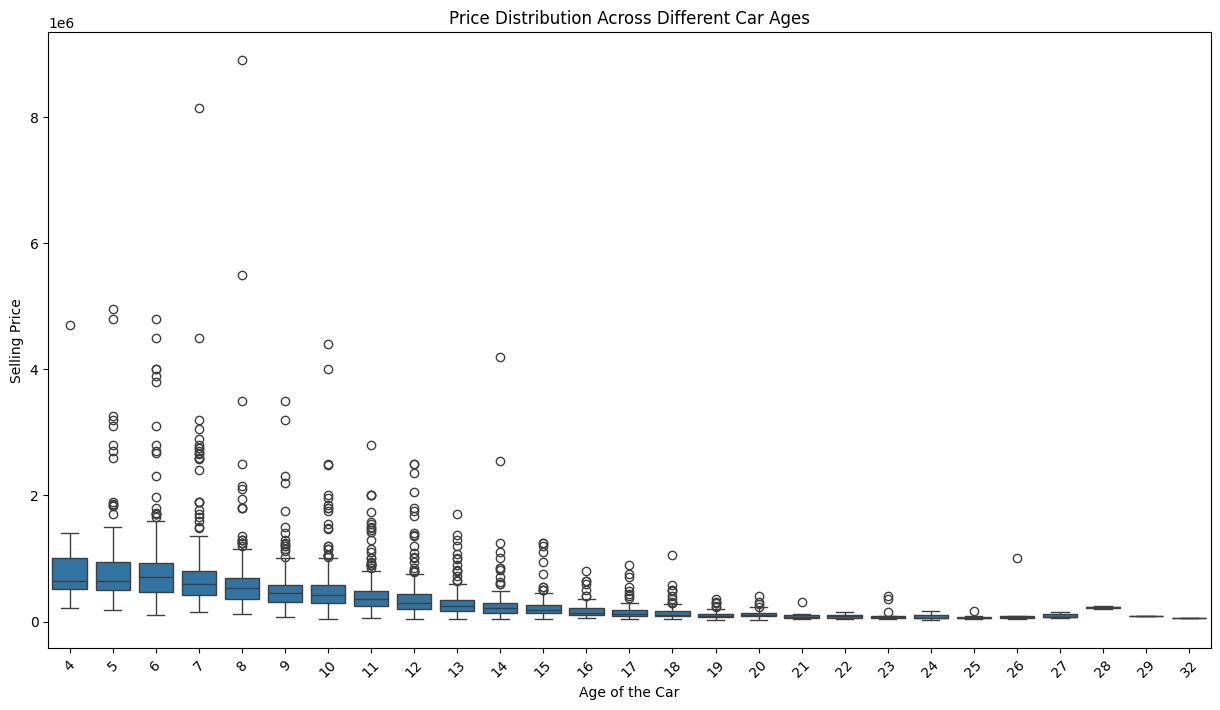

In [87]:
# show price distribution by age
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.boxplot(x="age", y="selling_price", data=df)
plt.title("Price Distribution Across Different Car Ages")
plt.xlabel("Age of the Car")
plt.ylabel("Selling Price")
plt.xticks(rotation=45)
plt.show()

#### Insights:

> Cars between 0-5 years old retain high resale value, with minimal depreciation.

> After 5 years, car prices drop significantly, possibly due to wear and tear or higher maintenance costs.

> Older cars (10+ years) show a plateau in resale prices, possibly bought for parts or as second-hand economy cars.


#### Analysis of Seller Type and Its Impact on Selling Price


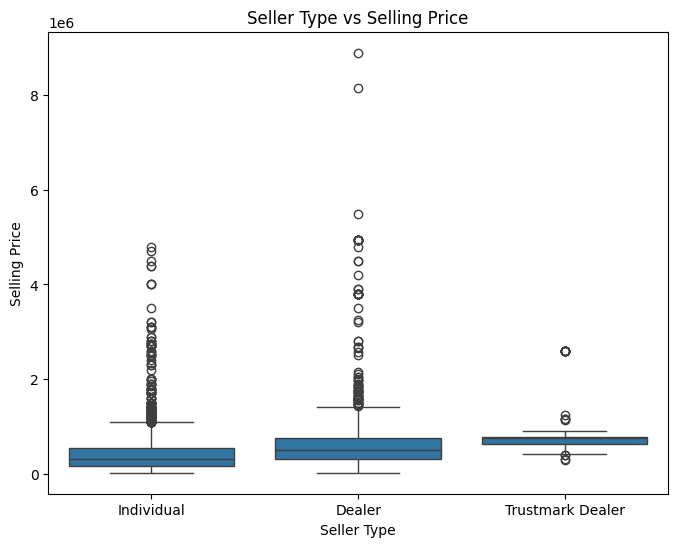

In [88]:
# Boxplot for seller type vs selling price
plt.figure(figsize=(8, 6))
sns.boxplot(x="seller_type", y="selling_price", data=eda_df)
plt.title("Seller Type vs Selling Price")
plt.xlabel("Seller Type")
plt.ylabel("Selling Price")
plt.show()

#### Insights:

> Dealers tend to sell cars at higher average prices compared to individuals.  
> This could indicate:

    > Higher trust in dealers due to warranties or maintenance checks.

    > Individuals might price their cars lower for quicker sales.

> Individual sellers show a wider spread in prices, likely due to varied maintenance histories or urgent selling needs.


#### Correlation Between Kilometers Driven and Selling Price for Different Fuel Types


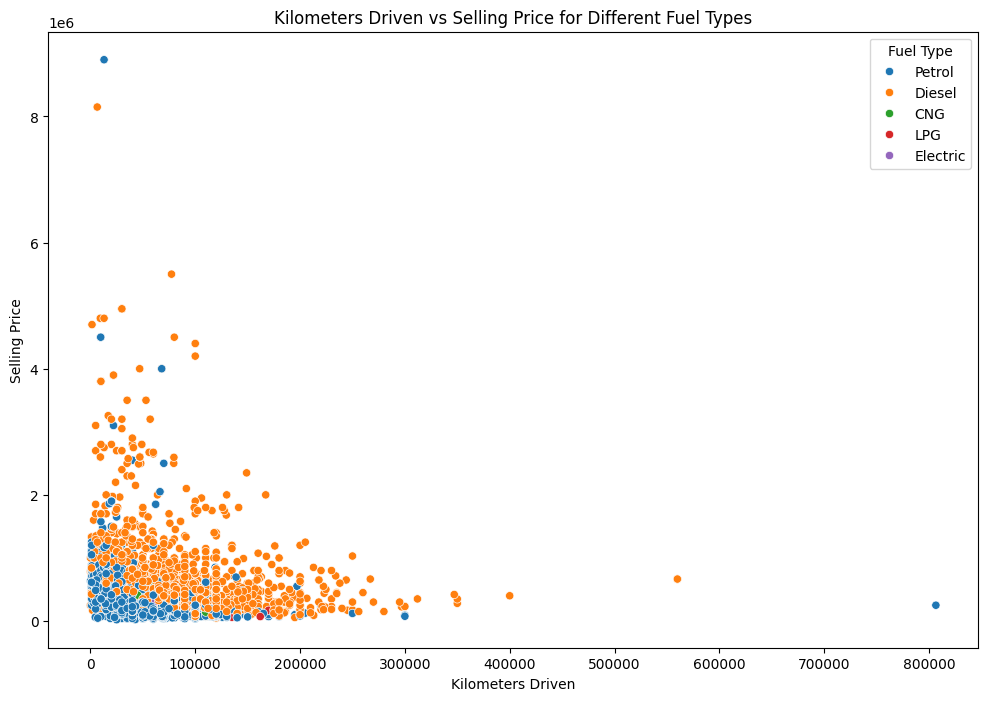

In [157]:
# Scatter plot of km_driven vs selling_price, separated by fuel type
plt.figure(figsize=(12, 8))
sns.scatterplot(x="km_driven", y="selling_price", hue="fuel", data=eda_df)
plt.title("Kilometers Driven vs Selling Price for Different Fuel Types")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.legend(title="Fuel Type")
plt.show()

### Insights:

> Diesel cars tend to retain their value better at higher mileage compared to petrol cars.

> Petrol cars show a steeper decline in price as kilometers increase, possibly due to engine efficiency differences.

> CNG cars often show low prices even at lower mileage, suggesting limited demand despite better cost efficiency.


#### Predicting the Most Popular Car Segments Based on Features


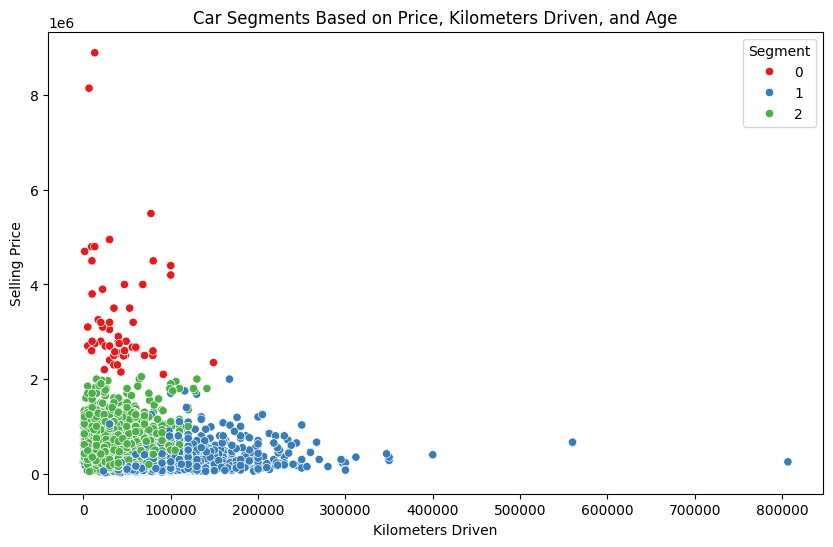

In [156]:
from sklearn.cluster import KMeans
import numpy as np

# Select relevant features for clustering
cluster_data = eda_df[["selling_price", "km_driven", "age"]]

# Normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=100)
eda_df["segment"] = kmeans.fit_predict(cluster_data_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="km_driven", y="selling_price", hue="segment", data=eda_df, palette="Set1"
)
plt.title("Car Segments Based on Price, Kilometers Driven, and Age")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.legend(title="Segment")
plt.show()

### Insights:

> Segment 0: Economy Cars - Older cars with high mileage and low selling prices.

> Segment 1: Mid-Range Cars - Relatively newer cars with moderate mileage and selling prices.

> Segment 2: Luxury Cars - Low mileage, newer cars with high selling prices.
> Helps identify key market segments for targeted sales strategies or price negotiations.


### Prepare Data for ML Modeling


In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### Train Machine Models


#### Linear Regression

#### Random Forest

#### Gradient Boosting


In [148]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
df = pd.read_csv(r"C:\NISHANT\skill acadamy\Capstone Project\CAR DETAILS.csv")

# Separate features and target variable
X = df.drop(columns=["selling_price"])
y = df["selling_price"]

# One-Hot Encode categorical features
categorical_cols = ["name", "fuel", "seller_type", "transmission", "owner"]
encoder = OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore")
X_encoded = pd.DataFrame(
    encoder.fit_transform(X[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
)

# Drop original categorical columns and join encoded ones
X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, X_encoded], axis=1)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the fitted scaler and encoder
joblib.dump(scaler, "scaler.pkl")
joblib.dump(encoder, "encoder.pkl")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train models
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


# Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")


evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

# Save the best model (assuming Random Forest performs best)
joblib.dump(rf, "best_model.pkl")

Linear Regression - MAE: 1.7300608858706457e+19, MSE: 2.663475375588943e+39, RMSE: 5.160886915626947e+19, R²: -8.727833268966976e+27
Random Forest - MAE: 118946.31650010972, MSE: 129428839757.37813, RMSE: 359762.1989000208, R²: 0.5758799409405247
Gradient Boosting - MAE: 168872.10956134362, MSE: 140829226023.24173, RMSE: 375272.202572002, R²: 0.5385224825452967


['best_model.pkl']

### Save the Best Model and Load the Model


### Test the model on a New Dataset


In [ ]:
import pandas as pd
import joblib
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the original dataset
df = pd.read_csv(r"C:\NISHANT\skill acadamy\Capstone Project\CAR DETAILS.csv")

# Randomly pick 20 data points
np.random.seed(42)
sample_data = df.sample(n=20)

# Separate features and target variable
X_sample = sample_data.drop(columns=["selling_price"])
y_sample = sample_data["selling_price"]

# Debugging: Check for null values in the sample data
print("Null values in sample data before encoding:")
print(X_sample.isnull().sum())

# Load the scaler, encoder, and model
scaler = joblib.load("scaler.pkl")
encoder = joblib.load("encoder.pkl")
loaded_model = joblib.load("best_model.pkl")

# Encode sample data
X_sample_encoded = pd.DataFrame(
    encoder.transform(X_sample[categorical_cols]),
    columns=encoder.get_feature_names_out(categorical_cols),
)
print("X_sample_encoded shape:", X_sample_encoded.shape)

# Drop original categorical columns
X_sample = X_sample.drop(categorical_cols, axis=1)
print("X_sample shape after dropping categorical columns:", X_sample.shape)

# Ensure no duplicate rows before concatenation
X_sample.reset_index(drop=True, inplace=True)
X_sample_encoded.reset_index(drop=True, inplace=True)

# Concatenate the encoded columns
X_sample = pd.concat([X_sample, X_sample_encoded], axis=1)
print("X_sample shape after concatenation:", X_sample.shape)

# Ensure the columns match those of the training data
X_sample = X_sample.reindex(columns=X.columns, fill_value=0)
print("X_sample shape after reindexing:", X_sample.shape)

# Scale the sample data
X_sample_scaled = scaler.transform(X_sample)

# Predict using the loaded model
y_sample_pred = loaded_model.predict(X_sample_scaled)

# Verify the lengths match before creating DataFrame
if len(y_sample.values) == len(y_sample_pred):
    results = pd.DataFrame({"Actual": y_sample.values, "Predicted": y_sample_pred})
    print(results)
else:
    print(
        f"Length mismatch: Actuals={len(y_sample.values)}, Predicted={len(y_sample_pred)}"
    )

# Evaluate the model on the sampled dataset
if len(y_sample.values) == len(y_sample_pred):
    print("Sampled Data - R²:", r2_score(y_sample, y_sample_pred))
    print("Sampled Data - MAE:", mean_absolute_error(y_sample, y_sample_pred))
    print("Sampled Data - MSE:", mean_squared_error(y_sample, y_sample_pred))
else:
    print("Skipping evaluation due to length mismatch.")

Null values in sample data before encoding:
name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
dtype: int64
X_sample_encoded shape: (20, 1501)
X_sample shape after dropping categorical columns: (20, 2)
X_sample shape after concatenation: (20, 1503)
X_sample shape after reindexing: (20, 1503)
     Actual     Predicted
0    165000  1.755833e+05
1    250000  4.059100e+05
2    120000  1.218000e+05
3    450000  4.598499e+05
4    730000  1.218686e+06
5    155000  1.604540e+05
6    530000  5.204700e+05
7     92800  1.113140e+05
8    284000  5.356799e+05
9    260000  2.587100e+05
10   511000  5.729200e+05
11  1800000  4.948300e+05
12   320000  4.579750e+05
13    90000  7.930999e+04
14   850000  5.821400e+05
15   500000  4.685500e+05
16   624000  7.085600e+05
17   750000  8.200100e+05
18   125000  1.199682e+05
19   675000  9.014400e+05
Sampled Data - R²: 0.27034133877251065
Sampled Data - MAE: 157720.21866666668
Sampled 